In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 14

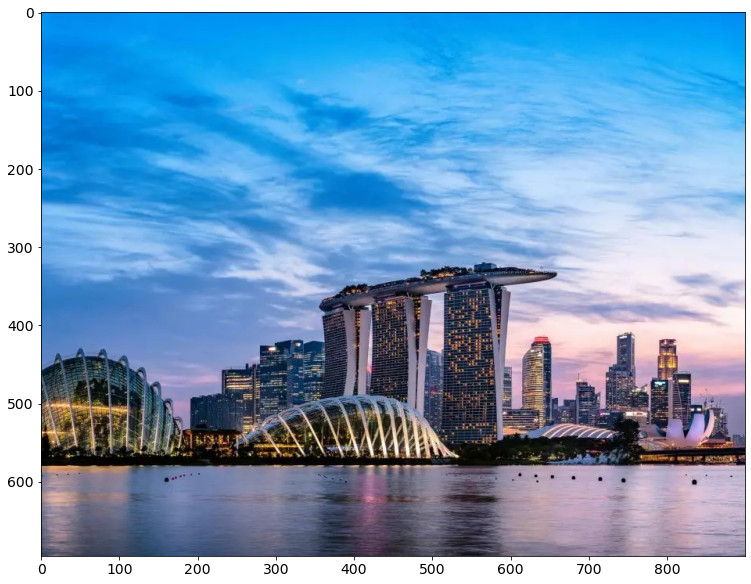

In [3]:
img = cv2.imread("pano1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]
plt.imshow(img)
plt.show()

In [4]:
get_grid(width, height, homogenous=False)

array([[  0,   0,   0, ..., 899, 899, 899],
       [  0,   1,   2, ..., 692, 693, 694]])

# Transformation Example from Scratch

## Create Graph Grid

In [20]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

## Transformation Matrices

In [6]:
angle = np.radians(10)
R = np.array([
    [np.cos(angle), np.sin(angle), 0],
    [-np.sin(angle), np.cos(angle), 0],
    [0, 0, 1]
])

S = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

T = np.array([
    [1,0,100],
    [0,1,50],
    [0,0,1],
])

Tinv = np.linalg.inv(S)

A = R @ S

x2, y2 = coords[0], coords[1]

## Rotation Transformation

In [13]:
coords = get_grid(width, height, True).astype(np.int32)
x2, y2 = coords[0], coords[1]

# Apply inverse transform and round it (nearest neighbour interpolation)
warp_coords = (R@coords).astype(np.int32)
x1, y1 = warp_coords[0, :], warp_coords[1, :]

# Get pixels within image boundaries
indices = np.where((x1 >= 0) & (x1 < width) &
                   (y1 >= 0) & (y1 < height))
xpix1, ypix1 = x2[indices], y2[indices]
xpix2, ypix2 = x1[indices], y1[indices]

# Map Correspondence
canvas = np.zeros(shape=(height,width,3),dtype=np.uint8)
canvas[ypix1, xpix1] = img[ypix2,xpix2]

## Output

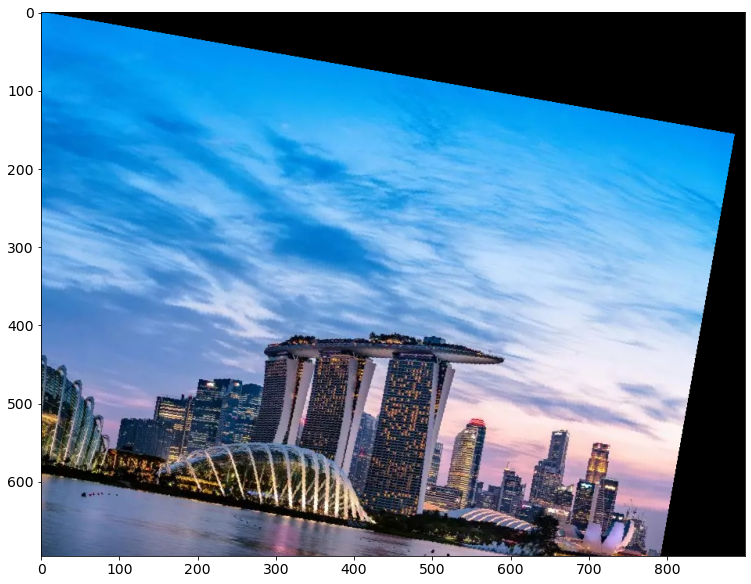

In [17]:
plt.imshow(canvas)

# OpenCV Affine Transformations

## Translation

In [18]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(width,height))

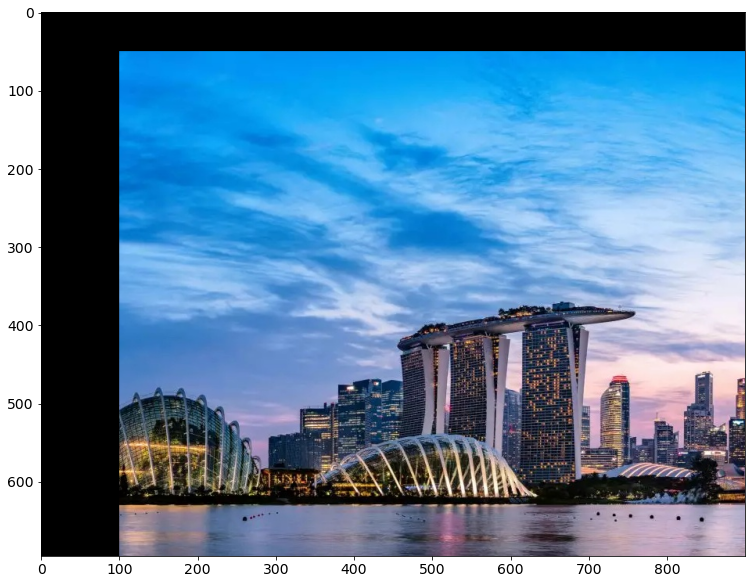

In [21]:
plt.imshow(dst)

## Rotation about Origin

In [45]:
angle = np.radians(20)
R = np.array([
    [np.cos(angle), np.sin(angle), 0],
    [-np.sin(angle), np.cos(angle), 0]])
dst = cv2.warpAffine(img,R,(width,height))

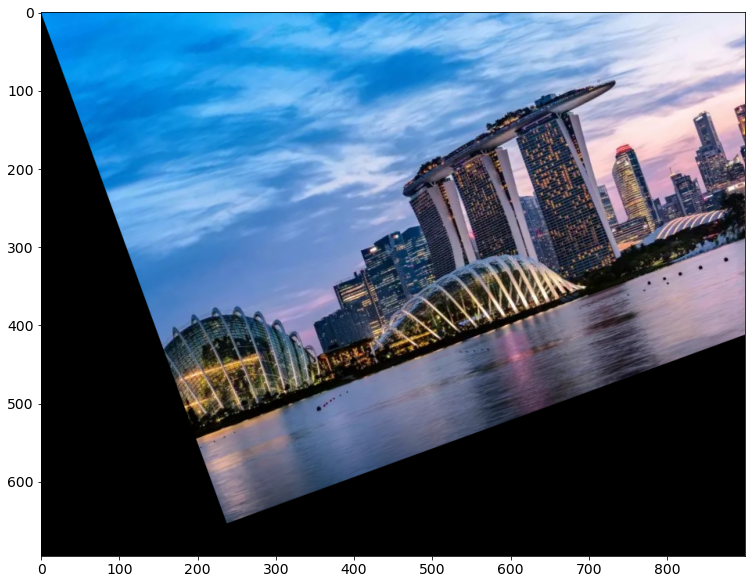

In [46]:
plt.imshow(dst)

## Rotation about Center

In [49]:
R = cv2.getRotationMatrix2D(center=(width//2, height//2), angle=20, scale=1)
dst = cv2.warpAffine(img,R,(width,height))

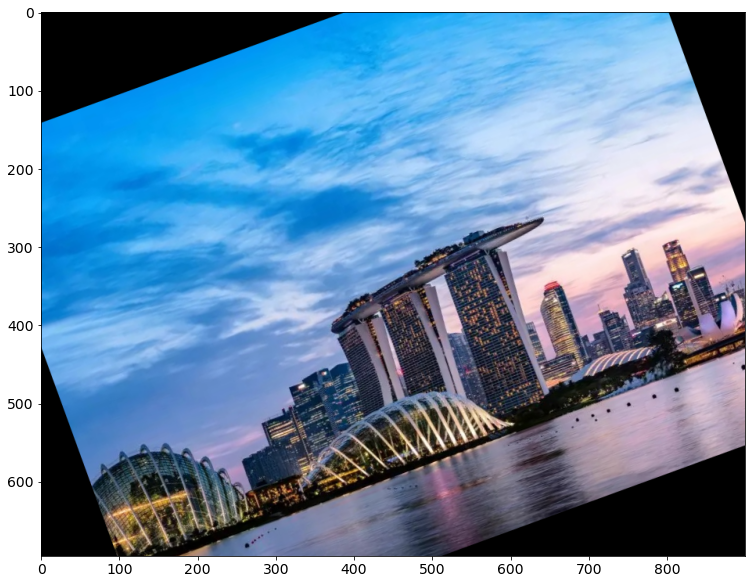

In [50]:
plt.imshow(dst)

## Scaling

In [57]:
scale = 2
S = np.array([
    [scale, 0, 0],
    [0, scale, 0]],dtype=np.float32)
dst = cv2.warpAffine(img,S,(width*scale,height*scale))

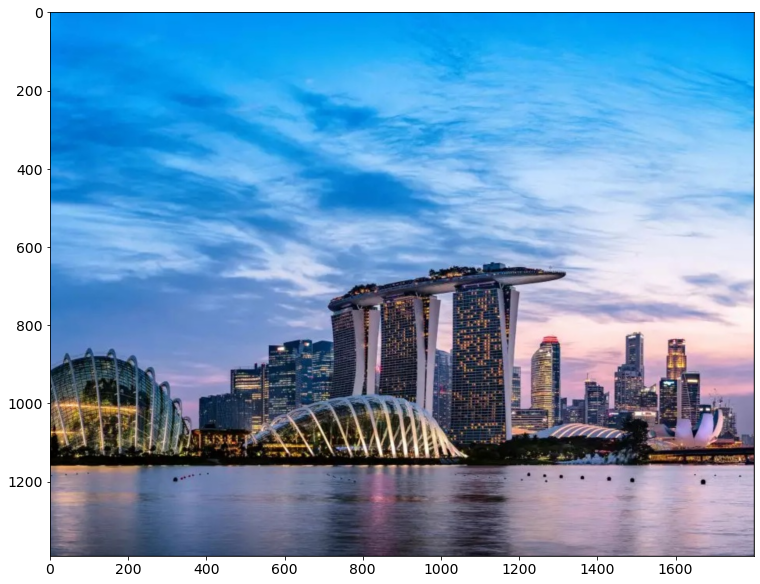

In [58]:
plt.imshow(dst)

## Shearing

In [69]:
sh_x = 0.5
sh_y = 0
Sh = np.array([
    [1, sh_x, 0],
    [sh_y, 1, 0]],dtype=np.float32)
dst = cv2.warpAffine(img,Sh,(width,height))

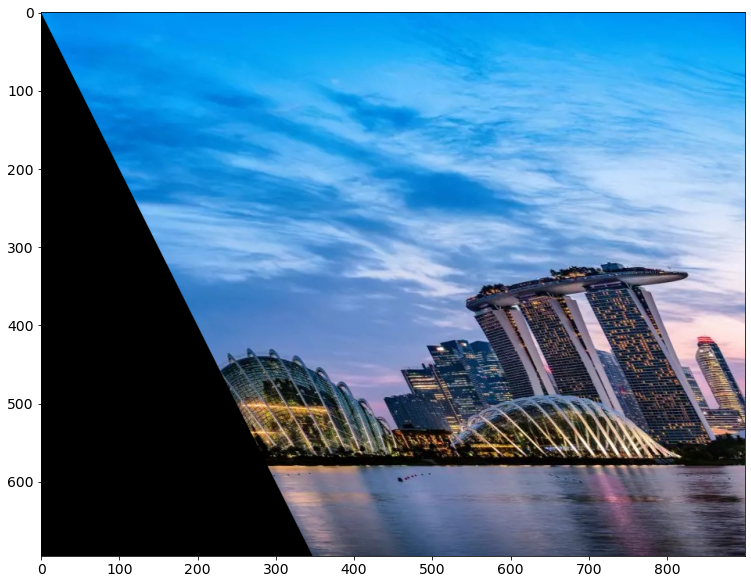

In [70]:
plt.imshow(dst)

# Perspective/Projective Transformation

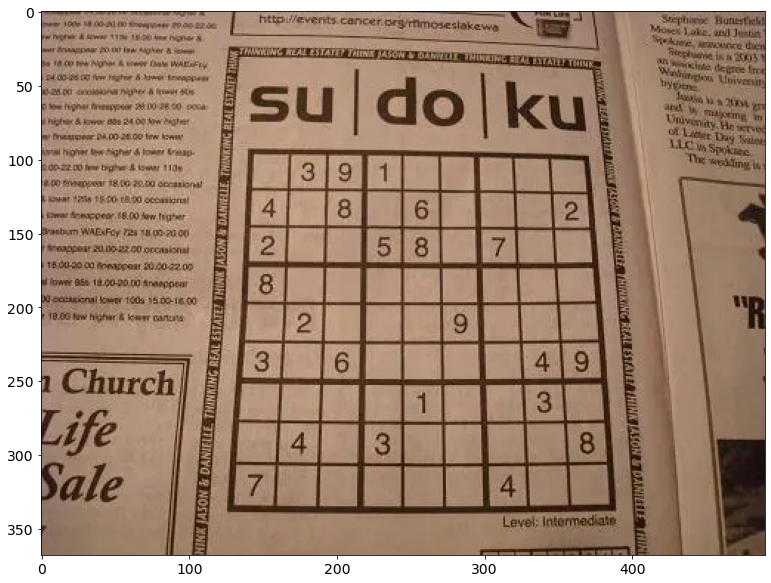

In [125]:
image = cv2.imread("sudoku.webp")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [126]:
image = cv2.circle(image, (140,90), radius=5, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (370,100), radius=5, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (130,335), radius=5, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (390,335), radius=5, color=(0, 0, 255), thickness=-1)

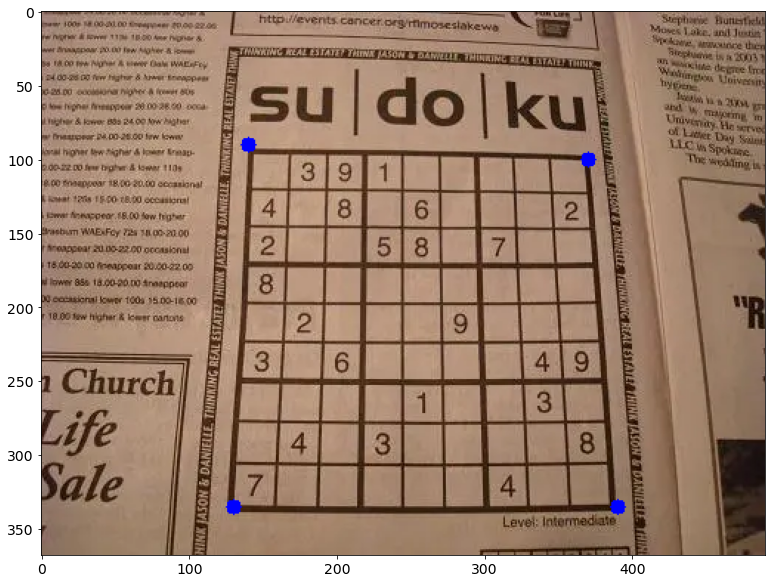

In [127]:
plt.imshow(image)

In [128]:
pts1 = np.float32([[140,90],[370,100],[130,335],[390,335]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(image,M,(300,300))

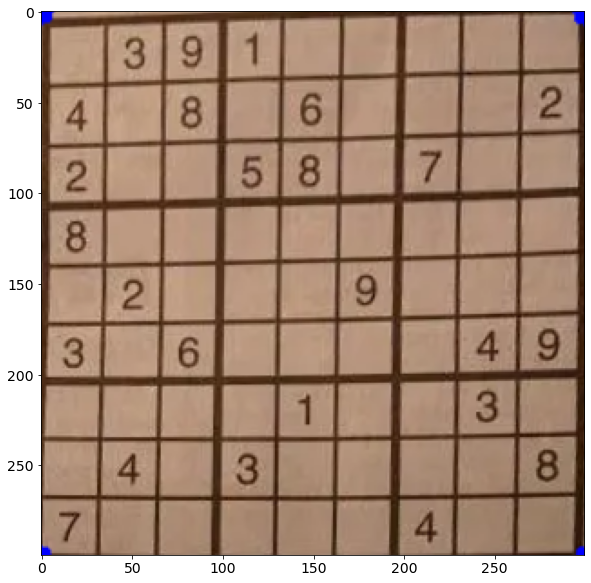

In [129]:
plt.imshow(dst)